In [1]:
import tensorflow as tf

from neuro.nn import activation, layer, losses, models, optimizer


In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train = x_train / 255.0
x_test = x_test / 255.0


In [3]:
def GetModel():
    return models.Sequential(
        layer.Flatten(),
        layer.Dense(28 * 28, 512),
        activation.ReLU(),
        layer.Dropout(0.25),
        layer.Dense(512, 128),
        activation.ReLU(),
        layer.Dense(128, 16),
        activation.ReLU(),
        layer.Dense(16, 10),
        activation.Softmax(),
    )


In [4]:
loss = losses.SparseCategoricalCrossentropy()
optimizers = [
    optimizer.SGD(lr=0.01),
    optimizer.AdaGrad(),
    optimizer.RMSProp(),
    optimizer.Adam(),
]


In [5]:
loss_history = {
    "SGD": [],
    "AdaGrad": [],
    "RMSProp": [],
    "Adam": [],
}

In [6]:
current_optimizer = None
epochs = 10
for optim in optimizers:
    model = GetModel()
    if isinstance(optim, optimizer.SGD):
        print("Optimizer: SGD")
        current_optimizer = "SGD"
    elif isinstance(optim, optimizer.AdaGrad):
        print("Optimizer: AdaGrad")
        current_optimizer = "AdaGrad"
    elif isinstance(optim, optimizer.RMSProp):
        print("Optimizer: RMSProp")
        current_optimizer = "RMSProp"
    elif isinstance(optim, optimizer.Adam):
        print("Optimizer: Adam")
        current_optimizer = "Adam"

    for i in range(epochs):
        # Forward Propagation
        y_pred = model(x_train)

        # Calculation of Loss
        train_loss = loss(y_pred, y_train).numpy()
        if (i % 10 == 0):
            print(f"Epoch: {i + 1}, Loss: {train_loss}")

        loss_history[current_optimizer].append(train_loss)

        # Back Propagation + Optimizing
        optim(model, loss)


Optimizer: SGD
Epoch: 1, Loss: 2.3019943237304688
Epoch: 11, Loss: 2.3019790649414062
Epoch: 21, Loss: 2.3019797801971436
Epoch: 31, Loss: 2.3019795417785645
Epoch: 41, Loss: 2.3019795417785645
Optimizer: AdaGrad
Epoch: 1, Loss: 2.3028790950775146
Epoch: 11, Loss: 2.235927104949951
Epoch: 21, Loss: 2.053053855895996
Epoch: 31, Loss: 1.8238794803619385
Epoch: 41, Loss: 1.6519700288772583
Optimizer: RMSProp
Epoch: 1, Loss: 2.3025314807891846
Epoch: 11, Loss: 2.0742692947387695
Epoch: 21, Loss: 1.5507491827011108
Epoch: 31, Loss: 1.0601356029510498
Epoch: 41, Loss: 0.9864310026168823
Optimizer: Adam
Epoch: 1, Loss: 2.30295467376709
Epoch: 11, Loss: 2.053684711456299
Epoch: 21, Loss: 0.9778382778167725
Epoch: 31, Loss: 0.6685676574707031
Epoch: 41, Loss: 0.5548043251037598


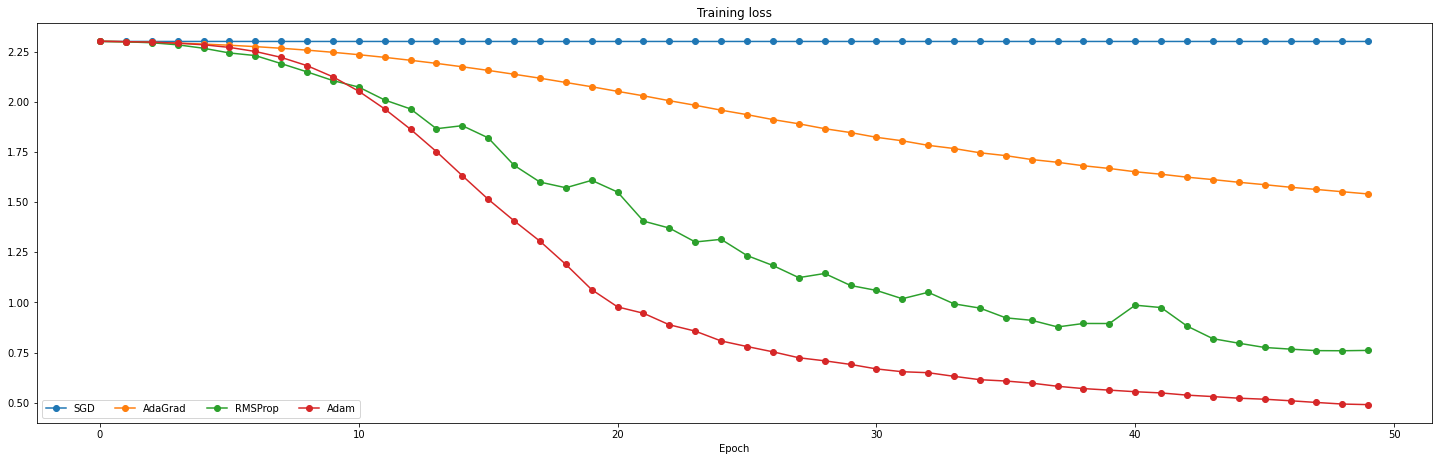

In [12]:
from matplotlib import pyplot as plt

plt.subplot(3, 1, 1)
plt.title("Training loss")
plt.xlabel("Epoch")

for optim, loss_hist in loss_history.items():
    plt.subplot(3, 1, 1)
    plt.plot(loss_hist, "-o", label=optim)


plt.subplot(3, 1, 1)
plt.legend(loc="lower left", ncol=4)
plt.gcf().set_size_inches(25, 25)
plt.show()
